In [60]:
from hossam import load_data, my_dpi

from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [61]:
origin = load_data("cars")
origin.head()

자동차의 속도(speed)에 따른 제동거리(dist) 조사 데이터 (출처: R 기본 데이터)

field    description
-------  -------------
speed    속도
dist     제동거리



,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [62]:
desc = origin.describe().T
desc


,count,mean,std,min,25%,50%,75%,max
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0


In [63]:
desc["missing"] = origin.isnull().sum()
desc

,count,mean,std,min,25%,50%,75%,max,missing
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0


In [64]:
Q1 = origin.quantile(0.25)
Q3 = origin.quantile(0.75)

IQR= Q3 - Q1
lower_bound = Q1- 1.5*IQR
upper_bound = Q3+ 1.5*IQR
outlier_count = ((origin< lower_bound)| (origin> upper_bound)).sum()
outlier_ratio = outlier_count/ len(origin) *100
desc["outlier_count"] = outlier_count
desc["outlier_ratio(%)"] = outlier_ratio
desc

,count,mean,std,min,25%,50%,75%,max,missing,outlier_count,outlier_ratio(%)
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0,0,0.0
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0,1,2.0


In [65]:
skewness_results = []

for column in origin.columns:
    skewness = origin[column].skew()
    if abs(skewness)<0.5:
        strength ="week"
        log_transform = "not needed"
    elif abs(skewness)<1:
        strength = "normal"
        long_transform = "recommended"

    else:
        strength = "strong"
        log_transform = "needed"

    desc.loc[column, "skewness"] = skewness
    desc.loc[column, "skewness_strength"] = strength
    desc.loc[column, "log_transform"] = log_transform

desc

,count,mean,std,min,25%,50%,75%,max,missing,outlier_count,outlier_ratio(%),skewness,skewness_strength,log_transform
speed,50.0,15.40,5.287644,4.0,12.0,15.0,19.0,25.0,0,0,0.0,-0.117510,week,not needed
dist,50.0,42.98,25.769377,2.0,26.0,36.0,56.0,120.0,0,1,2.0,0.806895,normal,not needed


In [66]:
df = origin.copy()
df["dist"] = np.log1p(df["dist"])
df.head()

,speed,dist
0,4,1.098612
1,4,2.397895
2,7,1.609438
3,7,3.135494
4,8,2.833213


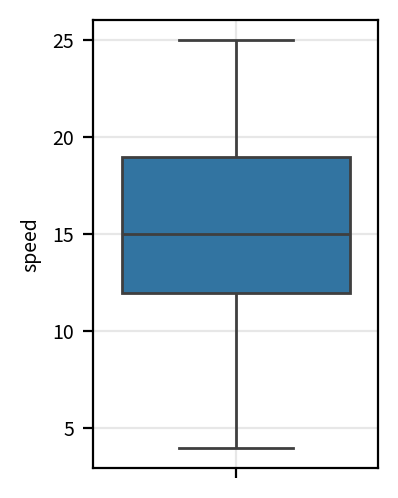

In [67]:
figsize = (400/ my_dpi, 500/my_dpi)
fig, ax =plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

sb.boxplot(data=df, y="speed")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [68]:
x = df[["speed"]]
x.head()

,speed
0,4
1,4
2,7
3,7
4,8


In [69]:
y=df["dist"]
y.head()

0    1.098612
1    2.397895
2    1.609438
3    3.135494
4    2.833213
Name: dist, dtype: float64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.25, random_state=52
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

display(x_train.head())
display(y_train.head())
display(x_test.head())
display(x_test.head())

(37, 1) (13, 1) (37,) (13,)


,speed
0,4
44,23
25,15
29,17
43,22


0     1.098612
44    4.007333
25    4.007333
29    3.713572
43    4.204693
Name: dist, dtype: float64

,speed
19,14
3,7
26,16
40,20
8,10


,speed
19,14
3,7
26,16
40,20
8,10


In [71]:
estimator = LinearRegression(n_jobs=-1)

estimator.fit(x_train, y_train)

print("계수(기울기): ", estimator.coef_)
print("절편: ", estimator.intercept_)
print("훈련 데이터 설명력: ", estimator.score(x_train, y_train))
print("검증 데이터 설명력: ", estimator.score(x_test, y_test))

계수(기울기):  [0.12418778]
절편:  1.6126343404098376
훈련 데이터 설명력:  0.7126860464637156
검증 데이터 설명력:  0.4227254438591028


In [72]:
print(f"log(dist) = {estimator.coef_[0]:.4f} * speed + {estimator.intercept_:.4f}")

log(dist) = 0.1242 * speed + 1.6126


In [73]:
y1 = estimator.predict(x_train)
y1

array([2.10938547, 4.46895332, 3.47545107, 3.72382663, 4.34476554,
       2.48194881, 3.35126329, 3.35126329, 4.59314111, 2.6061366 ,
       2.85451216, 3.10288772, 3.72382663, 3.22707551, 4.59314111,
       2.97869994, 3.10288772, 4.59314111, 3.9722022 , 4.09638998,
       3.22707551, 4.09638998, 3.9722022 , 4.09638998, 3.84801441,
       4.09638998, 3.9722022 , 3.59963885, 4.59314111, 2.73032438,
       3.84801441, 4.71732889, 3.35126329, 3.47545107, 3.10288772,
       3.10288772, 3.72382663])

In [74]:
y2 = estimator.predict(x_test)
y2

array([3.35126329, 2.48194881, 3.59963885, 4.09638998, 2.85451216,
       2.97869994, 3.47545107, 2.85451216, 3.84801441, 3.84801441,
       3.22707551, 2.10938547, 3.22707551])

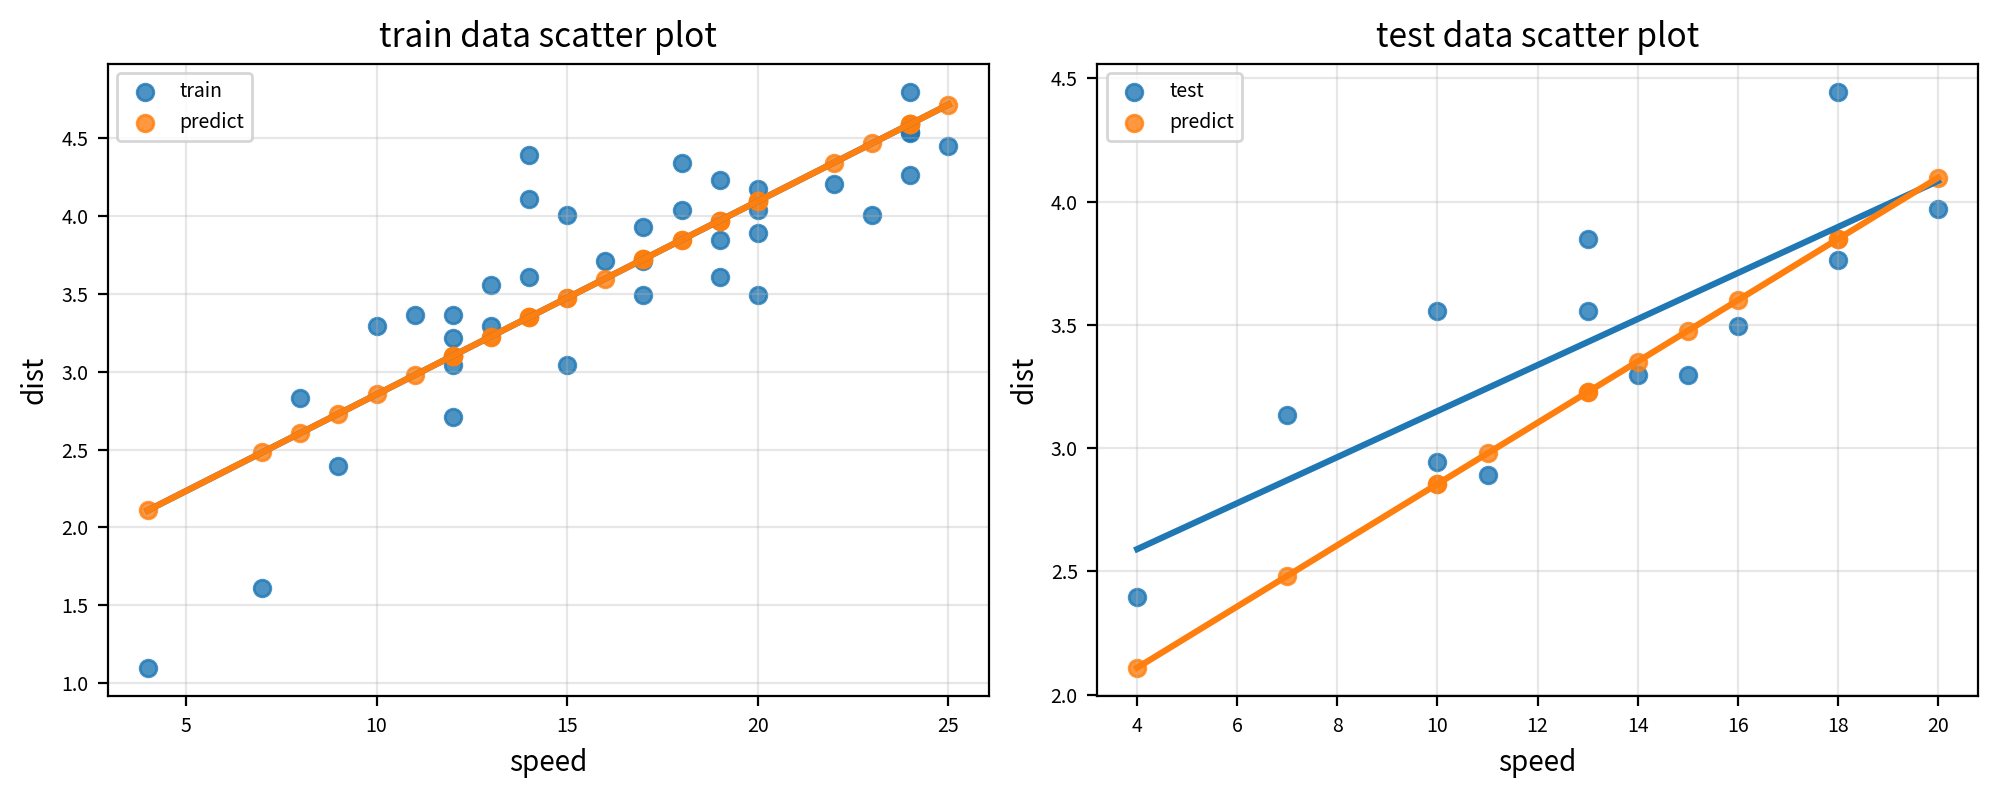

In [75]:
figsize = (2000/my_dpi, 800/my_dpi)
fig, ax = plt.subplots(1, 2, figsize=figsize, dpi=my_dpi)
fig.subplots_adjust(wspace=0.2, hspace=0.2 )

#훈련 데이터 시각화
sb.regplot(data=x_train, x="speed", y=y_train, ci=0, label="train", ax=ax[0])
sb.regplot(data=x_train, x="speed", y=y1, ci=0, label="predict", ax=ax[0])
ax[0].set_title("train data scatter plot", fontsize=12)
ax[0].set_xlabel("speed", fontsize=10)
ax[0].set_ylabel("dist", fontsize=10)
ax[0].legend()
ax[0].grid(True, alpha=0.3)

#검증 데이터 시각화
sb.regplot(data=x_test, x="speed", y=y_test, ci=0, label="test", ax=ax[1])
sb.regplot(data=x_test, x="speed", y=y2, ci=0, label="predict", ax=ax[1])
ax[1].set_title("test data scatter plot", fontsize=12)
ax[1].set_xlabel("speed", fontsize=10)
ax[1].set_ylabel("dist", fontsize=10)
ax[1].legend()
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

In [79]:
#새로운 관측값
new_X = DataFrame({"speed": [3.5, 3.7, 4.0]})
new_X.head()

,speed
0,3.5
1,3.7
2,4.0


In [80]:
#예측(독립변수만 전달)
y_pred = estimator.predict(new_X[["speed"]])
new_X["dist_pred"]=np.expm1(y_pred)
new_X

,speed,dist_pred
0,3.5,6.746891
1,3.7,6.941714
2,4.0,7.243174
